<a href="https://colab.research.google.com/github/Ghaby-X/VP16-inhibitors-pred/blob/main/FinalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPARATION 1**

**Goal** : To prepare a dataset consisting of molecular descriptors and their encoded activity score

**Steps**
1. Importing the raw datafile and extracting the relevant columns
2. Importing libraries for computing molecular descriptors and computing the molecular descriptors
3. Organizing and exporting final dataset

In [ ]:
#Importing libraries for DATA PREPARARION 1

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/assay_results_raw.csv"


In [ ]:
data = pd.read_csv(url)
data

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Average Inhibition at 8.5 uM,Standard Deviation,Inhibition at 8.5 uM [1],Inhibition at 8.5 uM [2],Inhibition at 8.5 uM [3]
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT,FLOAT,FLOAT,FLOAT,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normalized average percent inhibition of the c...,Standard deviation derived from the normalized...,Normalized percent inhibition of the confirmat...,Normalized percent inhibition of the confirmat...,Normalized percent inhibition of the confirmat...
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PERCENT,NONE,PERCENT,PERCENT,PERCENT
3,RESULT_ATTR_CONC_MICROMOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,NaN,8.5,8.5,8.5
4,1,92764137.0,40586.0,CC1C2=C(CC(O1)CC(=O)O)C(=O)C3=C(C2=O)C(=CC=C3)O,Active,99.0,NaN,NaN,98.15,0.439469,98.0905,98.7127,97.6409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2493,49725272.0,9593459.0,COC1=CC=C(C=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,Inactive,0.0,NaN,NaN,-167.9,25.2076,-153.2,-203.379,-147.13
2497,2494,49736636.0,9689721.0,CC1=CC(=CC=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,Inactive,0.0,NaN,NaN,-172.78,14.4944,-158.948,-166.584,-192.793
2498,2495,24820806.0,5346164.0,C1=CC=C2C=C(C=CC2=C1)C(=O)O/N=C(/C3=CC=CC=N3)\N,Inactive,0.0,NaN,NaN,-173.69,14.0888,-163.205,-193.601,-164.25
2499,2496,17411497.0,3762660.0,CN(C)S(=O)(=O)OC1=CC=CC(=C1)C(=O)NC2=CC=C(C=C2)Cl,Inactive,0.0,NaN,NaN,-187.44,5.28504,-194.807,-184.881,-182.647


In [ ]:
data = data.drop([0,1,2,3]).reset_index(drop = True)
data

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Average Inhibition at 8.5 uM,Standard Deviation,Inhibition at 8.5 uM [1],Inhibition at 8.5 uM [2],Inhibition at 8.5 uM [3]
0,1,92764137.0,40586.0,CC1C2=C(CC(O1)CC(=O)O)C(=O)C3=C(C2=O)C(=CC=C3)O,Active,99.0,NaN,NaN,98.15,0.439469,98.0905,98.7127,97.6409
1,2,93576581.0,407401.0,CCN(CC)C1=CC=C(C=C1)C(=C2C=CC(=[N+](CC)CC)C=C2...,Active,99.0,NaN,NaN,98.15,0.337192,98.3731,98.3961,97.6696
2,3,99356200.0,283138.0,CC1C2=C(C3C(O1)CC(=O)O3)C(=O)C4=C(C2=O)C(=CC=C4)O,Active,98.0,NaN,NaN,97.16,0.67469,97.1088,96.3643,98.0143
3,4,14730721.0,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,Active,98.0,NaN,NaN,97.14,0.597194,97.0544,96.462,97.9165
4,5,121283339.0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,Active,98.0,NaN,NaN,96.83,0.583606,96.1233,96.8238,97.5528
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,2493,49725272.0,9593459.0,COC1=CC=C(C=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,Inactive,0.0,NaN,NaN,-167.9,25.2076,-153.2,-203.379,-147.13
2493,2494,49736636.0,9689721.0,CC1=CC(=CC=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,Inactive,0.0,NaN,NaN,-172.78,14.4944,-158.948,-166.584,-192.793
2494,2495,24820806.0,5346164.0,C1=CC=C2C=C(C=CC2=C1)C(=O)O/N=C(/C3=CC=CC=N3)\N,Inactive,0.0,NaN,NaN,-173.69,14.0888,-163.205,-193.601,-164.25
2495,2496,17411497.0,3762660.0,CN(C)S(=O)(=O)OC1=CC=CC(=C1)C(=O)NC2=CC=C(C=C2)Cl,Inactive,0.0,NaN,NaN,-187.44,5.28504,-194.807,-184.881,-182.647


In [ ]:
#displaying the first five columns of the dataset
data.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Average Inhibition at 8.5 uM,Standard Deviation,Inhibition at 8.5 uM [1],Inhibition at 8.5 uM [2],Inhibition at 8.5 uM [3]
0,1,92764137.0,40586.0,CC1C2=C(CC(O1)CC(=O)O)C(=O)C3=C(C2=O)C(=CC=C3)O,Active,99.0,NaN,NaN,98.15,0.439469,98.0905,98.7127,97.6409
1,2,93576581.0,407401.0,CCN(CC)C1=CC=C(C=C1)C(=C2C=CC(=[N+](CC)CC)C=C2...,Active,99.0,NaN,NaN,98.15,0.337192,98.3731,98.3961,97.6696
2,3,99356200.0,283138.0,CC1C2=C(C3C(O1)CC(=O)O3)C(=O)C4=C(C2=O)C(=CC=C4)O,Active,98.0,NaN,NaN,97.16,0.67469,97.1088,96.3643,98.0143
3,4,14730721.0,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,Active,98.0,NaN,NaN,97.14,0.597194,97.0544,96.462,97.9165
4,5,121283339.0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,Active,98.0,NaN,NaN,96.83,0.583606,96.1233,96.8238,97.5528


### **Exctracting needed columns**

This step involves forming a relevant dataset out of the general dataset.








In [ ]:
#extracting the three columns 
cols_ml = ["PUBCHEM_EXT_DATASOURCE_SMILES", "PUBCHEM_ACTIVITY_SCORE"]
data1 = data[cols_ml]
data1.columns = ["Canonical_SMILES", "Activity_score"]
data1

,Canonical_SMILES,Activity_score
0,CC1C2=C(CC(O1)CC(=O)O)C(=O)C3=C(C2=O)C(=CC=C3)O,99.0
1,CCN(CC)C1=CC=C(C=C1)C(=C2C=CC(=[N+](CC)CC)C=C2...,99.0
2,CC1C2=C(C3C(O1)CC(=O)O3)C(=O)C4=C(C2=O)C(=CC=C4)O,98.0
3,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,98.0
4,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,98.0
...,...,...
2492,COC1=CC=C(C=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,0.0
2493,CC1=CC(=CC=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,0.0
2494,C1=CC=C2C=C(C=CC2=C1)C(=O)O/N=C(/C3=CC=CC=N3)\N,0.0
2495,CN(C)S(=O)(=O)OC1=CC=CC(=C1)C(=O)NC2=CC=C(C=C2)Cl,0.0


In [ ]:
data1["Activity_outcome"] = data1["Activity_score"].apply(lambda x: 1 if x >= 25 else 0)
data1

<ipython-input-59-b2ef9211206f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Activity_outcome"] = data1["Activity_score"].apply(lambda x: 1 if x >= 24 else 0)


,Canonical_SMILES,Activity_score,Activity_outcome
0,CC1C2=C(CC(O1)CC(=O)O)C(=O)C3=C(C2=O)C(=CC=C3)O,99.0,1
1,CCN(CC)C1=CC=C(C=C1)C(=C2C=CC(=[N+](CC)CC)C=C2...,99.0,1
2,CC1C2=C(C3C(O1)CC(=O)O3)C(=O)C4=C(C2=O)C(=CC=C4)O,98.0,1
3,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,98.0,1
4,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,98.0,1
...,...,...,...
2492,COC1=CC=C(C=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,0.0,0
2493,CC1=CC(=CC=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,0.0,0
2494,C1=CC=C2C=C(C=CC2=C1)C(=O)O/N=C(/C3=CC=CC=N3)\N,0.0,0
2495,CN(C)S(=O)(=O)OC1=CC=CC(=C1)C(=O)NC2=CC=C(C=C2)Cl,0.0,0


In [ ]:
data1.drop("Activity_score", axis = 1, inplace = True)
data1

<ipython-input-60-4851789f4473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop("Activity_score", axis = 1, inplace = True)


,Canonical_SMILES,Activity_outcome
0,CC1C2=C(CC(O1)CC(=O)O)C(=O)C3=C(C2=O)C(=CC=C3)O,1
1,CCN(CC)C1=CC=C(C=C1)C(=C2C=CC(=[N+](CC)CC)C=C2...,1
2,CC1C2=C(C3C(O1)CC(=O)O3)C(=O)C4=C(C2=O)C(=CC=C4)O,1
3,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,1
4,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,1
...,...,...
2492,COC1=CC=C(C=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,0
2493,CC1=CC(=CC=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,0
2494,C1=CC=C2C=C(C=CC2=C1)C(=O)O/N=C(/C3=CC=CC=N3)\N,0
2495,CN(C)S(=O)(=O)OC1=CC=CC(=C1)C(=O)NC2=CC=C(C=C2)Cl,0


In [ ]:
#identifying the number of unique entries in the data
data1.nunique()

Canonical_SMILES    2490
Activity_outcome       2
dtype: int64

In [ ]:
#the data entries duplicates are dropped
data1.drop_duplicates(inplace = True, ignore_index = True)
data1


<ipython-input-62-525e7d161314>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop_duplicates(inplace = True, ignore_index = True)


,Canonical_SMILES,Activity_outcome
0,CC1C2=C(CC(O1)CC(=O)O)C(=O)C3=C(C2=O)C(=CC=C3)O,1
1,CCN(CC)C1=CC=C(C=C1)C(=C2C=CC(=[N+](CC)CC)C=C2...,1
2,CC1C2=C(C3C(O1)CC(=O)O3)C(=O)C4=C(C2=O)C(=CC=C4)O,1
3,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,1
4,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,1
...,...,...
2486,COC1=CC=C(C=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,0
2487,CC1=CC(=CC=C1)C(=O)O/N=C(/C2=CC=CC=N2)\N,0
2488,C1=CC=C2C=C(C=CC2=C1)C(=O)O/N=C(/C3=CC=CC=N3)\N,0
2489,CN(C)S(=O)(=O)OC1=CC=CC(=C1)C(=O)NC2=CC=C(C=C2)Cl,0


### **Initializing for molecular descriptors computing**



*   Importing the libraries required for computing molecular descriptors
*   Testing functions in the molecular descriptors



In [ ]:
!pip install rdkit
!pip install mordred

In [ ]:
# from rdkit import Chem
# from mordred import Calculator, descriptors

# # create descriptor calculator with all descriptors
# calc = Calculator(descriptors, ignore_3D=True)

# len(calc.descriptors)


## **Computing molecular descriptors**

In [ ]:
from rdkit import Chem
from rdkit.Chem import MACCSKeys
from mordred import Calculator, descriptors

smiles_list = data1['Canonical_SMILES'].to_list()
mols = [Chem.MolFromSmiles(smi) for smi in data]

#Function to calculate mordred descriptors
def mordred_desc(data):  #receives canonical smiles in a list datastructure
  # create descriptor calculator with all descriptors
  calc = Calculator(descriptors, ignore_3D=True)
  
  return calc.pandas(data)



#function to create MACCS keys and Morgan2 fingerprints
def maccs_fps(data):
  Mkeys = MACCSKeys.GenMACCSKeys(data)
  return Mkeys


In [ ]:
df_maccsfp = maccs_fps(mols)
df_maccsfp

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles(smiles_list[1])

In [ ]:
# df_mordred = mordred_desc(mols)

In [ ]:
# df_mordred["Activity"] = data1["Activity_outcome"]
# df_mordred

In [ ]:
#  # convert dataframe to csv
# df_mordred.to_csv("df_mordred.csv", index = False)

# # download csv file to local machine
# from google.colab import files
# files.download('df_mordred.csv')

#**DATA PREPARATION 2**

**Goal** : Preprocessing the data to be "machine learning" ready

**Steps**
1. Importing data prepared from data preparation 1 along withe the necessary libraries
2. Splitting the data set from onset to avoid bias
3. Converting all dtytpes into numeric dtypes
4. Handling missing values
5. Selecting relevant columns from ML data
6. Handling data imbalance using SMOTE

## **Initializing**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/df_mordred"

In [ ]:
df = pd.read_csv(url)
df

<ipython-input-87-4a22cb262de0>:1: DtypeWarning: Columns (141,142,150,151,168,169,177,178,186,187,195,196,204,205,213,214,222,223,231,232,348,349,357,358,366,367,384,385,393,394,402,403,411,412,420,421,429,430,438,439,447,448,455,456,463,464,471,472,487,488,495,496,503,504,511,512,519,520,527,528,535,536,543,544,551,552,559,560,567,568,583,584,591,592,599,600,607,608,615,616,623,624,631,632,639,640,833,841,1363,1364,1366) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Activity
0,17.303381,14.218401,1,0,27.299535815361796,2.547383671806154,5.094767343612308,27.299535815361796,1.2408879916073543,4.0330841160408095,...,56.823125,302.079038,8.391084,955,41,120.0,146.0,8.61111111111111,4.722222,1
1,25.182211,20.690802,2,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,69.735703,483.231205,7.003351,14500002360,47,164.0,185.0,13.20138888888889,7.888889,1
2,17.820217,14.672830,0,0,28.414167989099475,2.59072809689387,5.155187857380497,28.414167989099475,1.2915530904136125,4.065269057917032,...,71.254603,300.063388,8.825394,881,44,128.0,161.0,7.722222222222221,4.611111,1
3,13.520558,11.114447,0,0,22.436037510490813,2.5095473790188336,5.019094758037669,22.436037510490813,1.3197669123818125,3.7926770045314178,...,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527777777777779,3.666667,1
4,12.704061,10.489183,0,0,21.67924815048608,2.500522497173503,5.001044994347005,21.67924815048608,1.35495300940538,3.734853563530132,...,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666666666666667,3.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,14.987142,12.310612,0,2,26.1812797933597,2.288245611270737,4.576491222541476,26.1812797933597,1.309063989667985,3.8964809927650657,...,52.848757,271.095691,8.215021,946,27,96.0,108.0,6.555555555555555,4.638889,0
2487,14.389425,12.031060,0,2,24.468010698609397,2.285522149751842,4.571044299503685,24.468010698609397,1.2877900367689157,3.8488641093695772,...,51.641738,255.100777,7.971899,796,25,92.0,103.0,6.305555555555555,4.305556,0
2488,17.068022,13.185204,0,2,29.43608158417712,2.3701461728806343,4.740292345761269,29.436081584177117,1.3380037083716871,4.016836643314998,...,55.852263,291.100777,8.317165,1187,32,112.0,129.0,6.166666666666667,4.916667,0
2489,17.623910,14.538510,0,0,28.090200160977112,2.352835811728773,4.705671623457546,28.090200160977112,1.2213130504772658,4.041843753052422,...,57.064160,354.044106,9.316950,1316,33,116.0,131.0,9.229166666666666,4.986111,0


In [ ]:
X = df.drop("Activity", axis = 1)
X


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,17.303381,14.218401,1,0,27.299535815361796,2.547383671806154,5.094767343612308,27.299535815361796,1.2408879916073543,4.0330841160408095,...,10.291094,56.823125,302.079038,8.391084,955,41,120.0,146.0,8.61111111111111,4.722222
1,25.182211,20.690802,2,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,10.243916,69.735703,483.231205,7.003351,14500002360,47,164.0,185.0,13.20138888888889,7.888889
2,17.820217,14.672830,0,0,28.414167989099475,2.59072809689387,5.155187857380497,28.414167989099475,1.2915530904136125,4.065269057917032,...,10.439425,71.254603,300.063388,8.825394,881,44,128.0,161.0,7.722222222222221,4.611111
3,13.520558,11.114447,0,0,22.436037510490813,2.5095473790188336,5.019094758037669,22.436037510490813,1.3197669123818125,3.7926770045314178,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527777777777779,3.666667
4,12.704061,10.489183,0,0,21.67924815048608,2.500522497173503,5.001044994347005,21.67924815048608,1.35495300940538,3.734853563530132,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666666666666667,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,14.987142,12.310612,0,2,26.1812797933597,2.288245611270737,4.576491222541476,26.1812797933597,1.309063989667985,3.8964809927650657,...,9.583489,52.848757,271.095691,8.215021,946,27,96.0,108.0,6.555555555555555,4.638889
2487,14.389425,12.031060,0,2,24.468010698609397,2.285522149751842,4.571044299503685,24.468010698609397,1.2877900367689157,3.8488641093695772,...,9.545455,51.641738,255.100777,7.971899,796,25,92.0,103.0,6.305555555555555,4.305556
2488,17.068022,13.185204,0,2,29.43608158417712,2.3701461728806343,4.740292345761269,29.436081584177117,1.3380037083716871,4.016836643314998,...,9.868844,55.852263,291.100777,8.317165,1187,32,112.0,129.0,6.166666666666667,4.916667
2489,17.623910,14.538510,0,0,28.090200160977112,2.352835811728773,4.705671623457546,28.090200160977112,1.2213130504772658,4.041843753052422,...,9.918327,57.064160,354.044106,9.316950,1316,33,116.0,131.0,9.229166666666666,4.986111


In [ ]:
#Adding the activity column to this data
y = df["Activity"]
y

0       1
1       1
2       1
3       1
4       1
       ..
2486    0
2487    0
2488    0
2489    0
2490    0
Name: Activity, Length: 2491, dtype: int64

##**Splitting the Dataset**

In [ ]:
#Splitting our data into train and test data using train_test_split module

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
583,24.996027,17.484323,0,1,41.70642476058234,2.391374044193824,4.675595925350946,41.70642476058234,1.303325773768198,4.389007908120522,...,10.155063,81.502923,469.159076,7.819318,3841,44,164.0,187.0,9.0,7.055556
1766,21.367682,16.838588,0,0,34.91088321686504,2.4927617982983126,4.889141207204174,34.91088321686504,1.292995674698705,4.240316642331415,...,10.301626,76.465243,375.139448,8.155205,1891,45,146.0,175.0,8.36111111111111,5.861111
207,26.507699,18.975364,0,0,44.211806580569174,2.4505538856258333,4.736655177795387,44.211806580569174,1.2631944737305478,4.4556767829064,...,10.184711,85.017289,477.251523,6.817879,3854,53,172.0,196.0,11.86111111111111,7.972222
2002,22.769664,18.697899,0,0,37.78305740633217,2.4714066481893964,4.8834225794975765,37.78305740633217,1.3028640484942127,4.308341411822578,...,10.369577,80.641119,412.156912,7.776546,2311,47,156.0,187.0,8.95138888888889,6.361111
862,18.269707,16.166554,0,0,28.87918698900144,2.445124083751686,4.7855541635715255,28.87918698900144,1.20329945787506,4.08677738003528,...,10.048064,72.703001,327.183444,6.677213,1408,38,122.0,143.0,10.61111111111111,5.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,26.615846,20.773003,0,0,42.72146247150804,2.5162340580130738,4.954918092824719,42.72146247150804,1.2565136021031778,4.457250894911559,...,10.505478,84.526681,480.146741,8.278392,3447,55,182.0,214.0,12.034722222222221,7.375000
1095,19.258292,15.256642,0,0,32.519805948071046,2.4465067426259983,4.736902514584832,32.519805948071046,1.3007922379228418,4.14158147588493,...,10.014805,73.796012,338.163043,7.194958,1752,37,128.0,149.0,8.13888888888889,5.611111
1130,22.850545,17.846892,0,0,37.85145989546564,2.4334883798680362,4.84429267443735,37.85145989546564,1.3052227550160564,4.304722412313705,...,10.229007,80.079559,447.074505,8.941490,2582,46,154.0,181.0,8.340277777777779,6.305556
1294,24.753386,19.610995,0,2,41.454759413668185,2.5768038434874065,4.955787916542187,41.454759413668185,1.2954612316771308,4.395423538582158,...,10.440010,82.753896,501.126318,8.352105,2741,54,168.0,201.0,10.222222222222221,7.222222


In [ ]:
#Checking imbalance in dataset (training data)

In [ ]:
len(y_train)

1668

In [ ]:
y_train[y_train == 1].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 207    1
162    1
256    1
20     1
381    1
      ..
241    1
189    1
21     1
130    1
330    1
Name: Activity, Length: 271, dtype: int64>

In [ ]:
# from the code above, the length of the training dataset is 1669 with 411 actives and 1258 inactives

## **Converting the dtypes to either int or float**

In [ ]:
X_train.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O'), dtype('bool')],
      dtype=object)

In [ ]:
#function that checks if an entry dtype is numeric. If not, it converts it to numeric or not available

def convert_to_float_or_not_available(x):
    if isinstance(x, str):
        try:
            return float(x)
        except ValueError:
            return np.nan
    else:
        return x



In [ ]:
# Apply the function to all columns in the DataFrame
X_train = X_train.applymap(convert_to_float_or_not_available)
X_train = X_train.copy()
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
583,24.996027,17.484323,0,1,41.706425,2.391374,4.675596,41.706425,1.303326,4.389008,...,10.155063,81.502923,469.159076,7.819318,3841,44,164.0,187.0,9.000000,7.055556
1766,21.367682,16.838588,0,0,34.910883,2.492762,4.889141,34.910883,1.292996,4.240317,...,10.301626,76.465243,375.139448,8.155205,1891,45,146.0,175.0,8.361111,5.861111
207,26.507699,18.975364,0,0,44.211807,2.450554,4.736655,44.211807,1.263194,4.455677,...,10.184711,85.017289,477.251523,6.817879,3854,53,172.0,196.0,11.861111,7.972222
2002,22.769664,18.697899,0,0,37.783057,2.471407,4.883423,37.783057,1.302864,4.308341,...,10.369577,80.641119,412.156912,7.776546,2311,47,156.0,187.0,8.951389,6.361111
862,18.269707,16.166554,0,0,28.879187,2.445124,4.785554,28.879187,1.203299,4.086777,...,10.048064,72.703001,327.183444,6.677213,1408,38,122.0,143.0,10.611111,5.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,26.615846,20.773003,0,0,42.721462,2.516234,4.954918,42.721462,1.256514,4.457251,...,10.505478,84.526681,480.146741,8.278392,3447,55,182.0,214.0,12.034722,7.375000
1095,19.258292,15.256642,0,0,32.519806,2.446507,4.736903,32.519806,1.300792,4.141581,...,10.014805,73.796012,338.163043,7.194958,1752,37,128.0,149.0,8.138889,5.611111
1130,22.850545,17.846892,0,0,37.851460,2.433488,4.844293,37.851460,1.305223,4.304722,...,10.229007,80.079559,447.074505,8.941490,2582,46,154.0,181.0,8.340278,6.305556
1294,24.753386,19.610995,0,2,41.454759,2.576804,4.955788,41.454759,1.295461,4.395424,...,10.440010,82.753896,501.126318,8.352105,2741,54,168.0,201.0,10.222222,7.222222


In [ ]:
X_train.dtypes

ABC         float64
ABCGG       float64
nAcid         int64
nBase         int64
SpAbs_A     float64
             ...   
WPol          int64
Zagreb1     float64
Zagreb2     float64
mZagreb1    float64
mZagreb2    float64
Length: 1613, dtype: object

In [ ]:
X_train.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('bool')], dtype=object)

## **Scaling the train_data**

In [ ]:
# scaling the data

from sklearn.preprocessing import StandardScaler

cols = X_train.columns
# Initialize the StandardScaler transformer
scaler = StandardScaler()

# Fit the transformer on the training data
scaler.fit(X_train)

# Transform the training data using the fitted transformer
X_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns = cols)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## **Imputing missing values**

In [ ]:
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.681865,0.230335,-0.300696,1.395784,0.720179,-0.649513,-1.047692,0.720179,0.305199,0.731397,...,-0.082043,0.858335,0.776933,-0.302550,-0.225538,0.047869,0.528364,0.370984,-0.017353,0.715860
1,-0.020521,0.045019,-0.300696,-0.475733,-0.092522,0.528508,0.325069,-0.092522,0.039824,0.068657,...,0.346499,0.396379,-0.240303,0.018927,-0.225539,0.120521,0.035920,0.107253,-0.248046,-0.135389
2,0.974500,0.658242,-0.300696,-0.475733,1.019806,0.038096,-0.655177,1.019806,-0.725751,1.028550,...,0.004647,1.180603,0.864488,-1.261022,-0.225538,0.701740,0.747227,0.568783,1.015749,1.369144
3,0.250879,0.578613,-0.300696,-0.475733,0.250971,0.280383,0.288308,0.250971,0.293337,0.371854,...,0.545186,0.779308,0.160203,-0.343487,-0.225538,0.265826,0.309500,0.370984,-0.034906,0.220948
4,-0.620238,-0.147845,-0.300696,-0.475733,-0.813872,-0.024993,-0.340833,-0.813872,-2.264418,-0.615690,...,-0.394902,0.051381,-0.759159,-1.395652,-0.225539,-0.388046,-0.620672,-0.596031,0.564394,-0.551115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0.995435,1.174137,-0.300696,-0.475733,0.841571,0.801232,0.747912,0.841571,-0.897378,1.035566,...,0.942554,1.135615,0.895813,0.136828,-0.225538,0.847045,1.020807,0.964380,1.078438,0.943520
1664,-0.428864,-0.408976,-0.300696,-0.475733,-0.378478,-0.008928,-0.653587,-0.378478,0.240114,-0.371420,...,-0.492149,0.151610,-0.640366,-0.900121,-0.225539,-0.460698,-0.456524,-0.464165,-0.328287,-0.313557
1665,0.266536,0.334387,-0.300696,-0.475733,0.259151,-0.160188,0.036764,0.259151,0.353931,0.355724,...,0.134166,0.727813,0.537991,0.771476,-0.225538,0.193173,0.254784,0.239119,-0.255569,0.181355
1666,0.634894,0.840658,-0.300696,3.267302,0.690082,1.504990,0.753503,0.690082,0.103163,0.759992,...,0.751128,0.973050,1.122799,0.207379,-0.225538,0.774392,0.637796,0.678671,0.423972,0.834639


In [ ]:
X_train.isnull().sum()

ABC           0
ABCGG         0
nAcid         0
nBase         0
SpAbs_A     191
           ... 
WPol          0
Zagreb1       0
Zagreb2       0
mZagreb1    146
mZagreb2      0
Length: 1613, dtype: int64

In [ ]:
#Dropping columns with too many missing values
max_missing_values = 100  # maximum number of missing values allowed in a column

# Get columns with too many missing values
cols_with_missing_values = X_train.columns[X_train.isna().sum() > max_missing_values]

cols_with_missing_values

X_train.drop(cols_with_missing_values, axis = 1, inplace = True)
X_train

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,0.681865,0.230335,-0.300696,1.395784,0.494751,0.402476,0.759853,0.677374,-0.125417,-0.146745,...,0.677108,-0.082043,0.858335,0.776933,-0.302550,-0.225538,0.047869,0.528364,0.370984,0.715860
1,-0.020521,0.045019,-0.300696,-0.475733,-0.649304,-0.691192,-0.266944,-0.095233,-0.125417,-0.146745,...,0.694515,0.346499,0.396379,-0.240303,0.018927,-0.225539,0.120521,0.035920,0.107253,-0.135389
2,0.974500,0.658242,-0.300696,-0.475733,-1.602683,-1.602581,1.493279,1.140938,-0.125417,-0.146745,...,0.741374,0.004647,1.180603,0.864488,-1.261022,-0.225538,0.701740,0.747227,0.568783,1.369144
3,0.250879,0.578613,-0.300696,-0.475733,0.113400,0.220198,0.246454,0.213810,-0.125417,-0.146745,...,0.865737,0.545186,0.779308,0.160203,-0.343487,-0.225538,0.265826,0.309500,0.370984,0.220948
4,-0.620238,-0.147845,-0.300696,-0.475733,-0.649304,-0.691192,-0.046916,-0.558797,-0.125417,-0.146745,...,0.741374,-0.394902,0.051381,-0.759159,-1.395652,-0.225539,-0.388046,-0.620672,-0.596031,-0.551115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0.995435,1.174137,-0.300696,-0.475733,1.257454,1.313865,0.613167,0.986417,-0.125417,-0.146745,...,0.694515,0.942554,1.135615,0.895813,0.136828,-0.225538,0.847045,1.020807,0.964380,0.943520
1664,-0.428864,-0.408976,-0.300696,-0.475733,0.113400,0.220198,-0.193602,-0.404275,-0.125417,-0.146745,...,0.741374,-0.492149,0.151610,-0.640366,-0.900121,-0.225539,-0.460698,-0.456524,-0.464165,-0.313557
1665,0.266536,0.334387,-0.300696,-0.475733,0.304075,0.220198,0.026426,0.213810,-0.125417,-0.146745,...,0.809974,0.134166,0.727813,0.537991,0.771476,-0.225538,0.193173,0.254784,0.239119,0.181355
1666,0.634894,0.840658,-0.300696,3.267302,0.113400,0.220198,0.759853,0.677374,-0.125417,-0.146745,...,0.809974,0.751128,0.973050,1.122799,0.207379,-0.225538,0.774392,0.637796,0.678671,0.834639


In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean').fit(X_train)


# Fit the imputer to the DataFrame and transform the DataFrame
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)

# Print the imputed DataFrame
X_train_imputed

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,0.681865,0.230335,-0.300696,1.395784,0.494751,0.402476,0.759853,0.677374,-0.125417,-0.146745,...,0.677108,-0.082043,0.858335,0.776933,-0.302550,-0.225538,0.047869,0.528364,0.370984,0.715860
1,-0.020521,0.045019,-0.300696,-0.475733,-0.649304,-0.691192,-0.266944,-0.095233,-0.125417,-0.146745,...,0.694515,0.346499,0.396379,-0.240303,0.018927,-0.225539,0.120521,0.035920,0.107253,-0.135389
2,0.974500,0.658242,-0.300696,-0.475733,-1.602683,-1.602581,1.493279,1.140938,-0.125417,-0.146745,...,0.741374,0.004647,1.180603,0.864488,-1.261022,-0.225538,0.701740,0.747227,0.568783,1.369144
3,0.250879,0.578613,-0.300696,-0.475733,0.113400,0.220198,0.246454,0.213810,-0.125417,-0.146745,...,0.865737,0.545186,0.779308,0.160203,-0.343487,-0.225538,0.265826,0.309500,0.370984,0.220948
4,-0.620238,-0.147845,-0.300696,-0.475733,-0.649304,-0.691192,-0.046916,-0.558797,-0.125417,-0.146745,...,0.741374,-0.394902,0.051381,-0.759159,-1.395652,-0.225539,-0.388046,-0.620672,-0.596031,-0.551115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0.995435,1.174137,-0.300696,-0.475733,1.257454,1.313865,0.613167,0.986417,-0.125417,-0.146745,...,0.694515,0.942554,1.135615,0.895813,0.136828,-0.225538,0.847045,1.020807,0.964380,0.943520
1664,-0.428864,-0.408976,-0.300696,-0.475733,0.113400,0.220198,-0.193602,-0.404275,-0.125417,-0.146745,...,0.741374,-0.492149,0.151610,-0.640366,-0.900121,-0.225539,-0.460698,-0.456524,-0.464165,-0.313557
1665,0.266536,0.334387,-0.300696,-0.475733,0.304075,0.220198,0.026426,0.213810,-0.125417,-0.146745,...,0.809974,0.134166,0.727813,0.537991,0.771476,-0.225538,0.193173,0.254784,0.239119,0.181355
1666,0.634894,0.840658,-0.300696,3.267302,0.113400,0.220198,0.759853,0.677374,-0.125417,-0.146745,...,0.809974,0.751128,0.973050,1.122799,0.207379,-0.225538,0.774392,0.637796,0.678671,0.834639


In [ ]:
X_train = X_train_imputed

In [ ]:
X_train.isnull().sum()

ABC          0
ABCGG        0
nAcid        0
nBase        0
nAromAtom    0
            ..
WPath        0
WPol         0
Zagreb1      0
Zagreb2      0
mZagreb2     0
Length: 1165, dtype: int64

In [ ]:
X_train.isnull().sum()[X_train.isnull().sum() != 0]

Series([], dtype: int64)

## **Feature Selection**

**Goal** : To select the most statistically relevant columns using Mutual Information ("mutual_info_classif" module)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
#code to generate statistically relevant features

mutual_info = mutual_info_classif(X_train_imputed, y_train)

mi_scores = pd.Series(mutual_info)
mi_scores.index = X_train_imputed.columns
mi_scores

ABC          0.015453
ABCGG        0.002010
nAcid        0.000000
nBase        0.000000
nAromAtom    0.024148
               ...   
WPath        0.027977
WPol         0.021050
Zagreb1      0.019639
Zagreb2      0.020190
mZagreb2     0.018922
Length: 1165, dtype: float64

In [ ]:
#arranging the relevance of features in descending order and selecting non-zero relevance

mi_scores_sorted = mi_scores.sort_values(ascending = False)
mi_scores_sorted = mi_scores_sorted[mi_scores_sorted != 0]
mi_scores_sorted

SlogP_VSA6    0.069506
PEOE_VSA8     0.059328
SlogP_VSA2    0.055973
PEOE_VSA9     0.052608
TIC5          0.051931
                ...   
AATS3Z        0.000178
AATS7i        0.000155
NssNH         0.000075
n7AHRing      0.000067
GATS4se       0.000021
Length: 894, dtype: float64

In [ ]:
#selecting the top 20 for plotting purposes

mi_scores_top20 = mi_scores_sorted[:20]
mi_scores_top20

SlogP_VSA6     0.069506
PEOE_VSA8      0.059328
SlogP_VSA2     0.055973
PEOE_VSA9      0.052608
TIC5           0.051931
ATS7p          0.051796
SMR_VSA1       0.051333
ATS5pe         0.049315
EState_VSA1    0.049210
ATS6pe         0.048447
SMR_VSA5       0.048354
SMR_VSA3       0.048217
SMR_VSA7       0.047416
TopoPSA        0.047223
ATSC1i         0.047035
TopoPSA(NO)    0.046538
SlogP_VSA3     0.046198
Xc-6dv         0.046018
ATS3i          0.045844
VSA_EState2    0.045587
dtype: float64

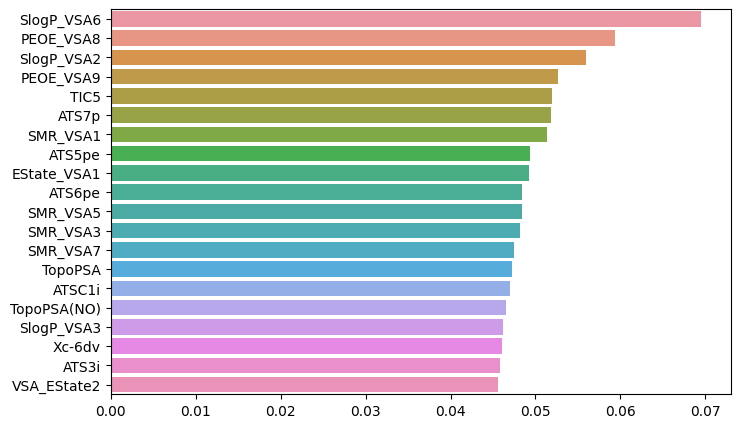

In [ ]:
#plotting the top20 most relevant columns

fig = plt.figure(figsize = (8,5))

sns.barplot(y = mi_scores_top20.index, x = mi_scores_top20.values)
plt.show()

In [ ]:
#storing the most relevant columns in mi_cols

mi_cols = mi_scores_sorted.index
mi_cols

Index(['SlogP_VSA6', 'PEOE_VSA8', 'SlogP_VSA2', 'PEOE_VSA9', 'TIC5', 'ATS7p',
       'SMR_VSA1', 'ATS5pe', 'EState_VSA1', 'ATS6pe',
       ...
       'n10FaHRing', 'SddsN', 'n9ARing', 'AATSC2d', 'GATS6c', 'AATS3Z',
       'AATS7i', 'NssNH', 'n7AHRing', 'GATS4se'],
      dtype='object', length=894)

In [ ]:
#Extracting the most relevant columns from X_train data

X_train = X_train[mi_cols]
X_train

,SlogP_VSA6,PEOE_VSA8,SlogP_VSA2,PEOE_VSA9,TIC5,ATS7p,SMR_VSA1,ATS5pe,EState_VSA1,ATS6pe,...,n10FaHRing,SddsN,n9ARing,AATSC2d,GATS6c,AATS3Z,AATS7i,NssNH,n7AHRing,GATS4se
0,0.412576,1.252726,0.279615,-0.217450,0.749424,0.539593,-0.614512,0.217936,-0.594528,0.250854,...,-0.308587,0.185812,0.0,-0.905610,-0.086509,-0.490330,-0.012144,0.523700,-0.203320,-0.243069
1,-0.730362,-0.521668,-0.267457,-0.140570,-0.211745,-0.158193,0.667392,-0.102549,0.220389,-0.103015,...,-0.308587,0.185812,0.0,0.732814,-0.119290,-0.093286,0.452674,0.523700,-0.203320,-1.037264
2,1.934249,0.468168,0.304982,-0.149587,1.728281,2.036765,0.805417,1.508719,0.260559,1.721834,...,-0.308587,0.185812,0.0,-0.190977,-0.247606,-1.179369,-0.264310,0.523700,-0.203320,-0.603452
3,0.136094,0.044180,0.307285,0.217681,0.306807,0.280857,-0.243891,-0.021321,0.107539,0.212716,...,-0.308587,0.185812,0.0,1.025374,0.340771,-0.194510,-0.426477,0.523700,-0.203320,2.228344
4,-1.606864,-0.957616,-0.534356,-0.775947,-0.242946,-0.324250,-0.140726,0.116766,-0.594528,0.046399,...,-0.308587,0.185812,0.0,0.844430,-0.007629,-0.534126,0.377046,-0.972073,-0.203320,-0.400642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0.507086,0.384607,0.442695,2.365579,0.625015,0.964351,0.633760,0.538611,0.107539,0.646265,...,-0.308587,0.185812,0.0,1.186459,-0.637339,0.412912,-0.586689,2.019472,-0.203320,-1.235884
1664,-0.106122,-0.905379,-0.069968,0.377795,-0.140772,-0.594152,-0.111823,-0.308694,-0.166985,-0.091553,...,-0.308587,0.185812,0.0,0.279343,0.043781,-0.737727,1.308082,-0.972073,-0.203320,0.842089
1665,0.068181,-0.039518,0.095075,0.172797,0.048852,-0.001939,-0.243891,-0.107051,0.107539,-0.344208,...,-0.308587,0.185812,0.0,-0.211085,0.185198,0.460384,-0.942125,0.523700,4.641507,1.642291
1666,-0.184972,1.851138,1.943600,2.016768,0.726628,1.792704,0.361248,0.851099,-0.594528,1.064892,...,-0.308587,0.185812,0.0,1.887376,0.107097,0.273942,-0.661209,-0.972073,-0.203320,-1.454855


## **Data Imbalance**

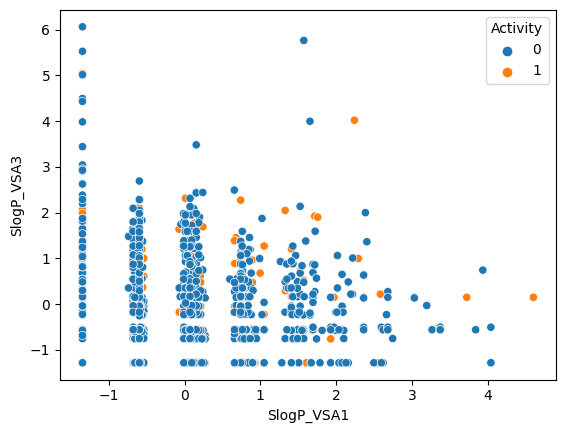

In [ ]:
#visualizing the datapoints across two features to observe the imbalance in datapoints

sns.scatterplot(data = X_train, x = "SlogP_VSA1", y = "SlogP_VSA3", hue = y)
plt.show()


In [ ]:
#resampling our data using SMOTE

from imblearn.over_sampling import SMOTE
# assume X is your feature matrix and y is your target vector
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled

,SlogP_VSA6,PEOE_VSA8,SlogP_VSA2,PEOE_VSA9,TIC5,ATS7p,SMR_VSA1,ATS5pe,EState_VSA1,ATS6pe,...,n10FaHRing,SddsN,n9ARing,AATSC2d,GATS6c,AATS3Z,AATS7i,NssNH,n7AHRing,GATS4se
0,0.412576,1.252726,0.279615,-0.217450,0.749424,0.539593,-0.614512,0.217936,-0.594528,0.250854,...,-0.308587,0.185812,0.0,-0.905610,-0.086509,-0.490330,-0.012144,0.523700,-0.203320,-0.243069
1,-0.730362,-0.521668,-0.267457,-0.140570,-0.211745,-0.158193,0.667392,-0.102549,0.220389,-0.103015,...,-0.308587,0.185812,0.0,0.732814,-0.119290,-0.093286,0.452674,0.523700,-0.203320,-1.037264
2,1.934249,0.468168,0.304982,-0.149587,1.728281,2.036765,0.805417,1.508719,0.260559,1.721834,...,-0.308587,0.185812,0.0,-0.190977,-0.247606,-1.179369,-0.264310,0.523700,-0.203320,-0.603452
3,0.136094,0.044180,0.307285,0.217681,0.306807,0.280857,-0.243891,-0.021321,0.107539,0.212716,...,-0.308587,0.185812,0.0,1.025374,0.340771,-0.194510,-0.426477,0.523700,-0.203320,2.228344
4,-1.606864,-0.957616,-0.534356,-0.775947,-0.242946,-0.324250,-0.140726,0.116766,-0.594528,0.046399,...,-0.308587,0.185812,0.0,0.844430,-0.007629,-0.534126,0.377046,-0.972073,-0.203320,-0.400642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,-0.826977,-0.982243,-0.818362,0.318576,-1.271521,-1.195048,-0.354422,-1.123968,-0.249682,-1.199336,...,-0.308587,-4.051604,0.0,-0.906259,-0.139957,1.325421,-0.784916,0.523700,-0.203320,-0.442675
2790,0.252759,-0.258821,-0.265592,1.433974,-0.487318,-0.308853,-0.942836,-0.176142,-0.594528,-0.104254,...,-0.308587,0.185812,0.0,0.255370,-0.878998,-0.150480,-0.103793,-0.972073,3.700978,-0.826579
2791,-0.401275,-1.105032,-0.584662,-0.853263,-1.052075,-0.742949,-0.314687,-0.975907,-0.040539,-0.898631,...,-0.308587,0.185812,0.0,1.161335,1.651997,3.331143,-0.582666,-0.656589,-0.203320,0.322355
2792,0.110732,-0.716610,-0.681107,-0.806334,-1.114297,-1.067280,-0.291112,-1.146335,-0.317534,-1.097347,...,-0.308587,0.185812,0.0,-1.363059,0.898245,1.538752,-0.791771,-0.467231,-0.203320,0.707515


In [ ]:
y_resampled

0       0
1       0
2       1
3       0
4       0
       ..
2789    1
2790    1
2791    1
2792    1
2793    1
Name: Activity, Length: 2794, dtype: int64

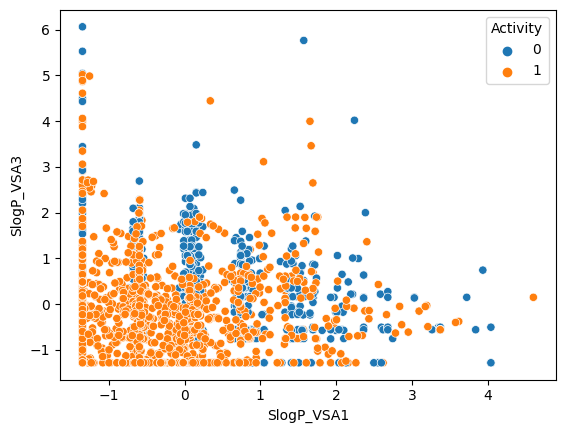

In [ ]:
#plotting resampled data to visualize datapoints distribution

sns.scatterplot(x = X_resampled["SlogP_VSA1"], y = X_resampled["SlogP_VSA3"], hue = y_resampled)
plt.show()

# **GENERAL PIPELINE**

**Goal** : To create a standalone pipeline that preprocess Raw data

In [ ]:
#Dropping columns with too many missing values
max_missing_values = 100  # maximum number of missing values allowed in a column

# Get columns with too many missing values
cols_with_missing_values = X_train.columns[X_train.isna().sum() > max_missing_values]

cols_with_missing_values

X_train.drop(cols_with_missing_values, axis = 1, inplace = True)
X_train

<ipython-input-305-eb641cdb2893>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(cols_with_missing_values, axis = 1, inplace = True)


,Xc-5dv,TopoPSA(NO),ATSC1i,SlogP_VSA1,PEOE_VSA8,ATSC0d,IC5,VSA_EState2,Xc-5d,SdsCH,...,NsssSiH,AATS4pe,SsssSiH,SlogP_VSA7,AATSC5dv,NaaaC,MATS5c,n6AHRing,MATS5m,ATSC2m
0,0.801531,-0.196299,0.003400,0.124967,1.214920,0.214398,-0.698008,1.271220,0.353205,0.928016,...,0.0,-0.725222,0.0,-0.386081,0.119311,-0.661113,1.020790,-0.701136,-1.154128,1.091741
1,0.665813,0.729399,1.930606,0.984308,-1.419528,0.124912,-1.246874,1.568156,0.659485,-0.366719,...,0.0,-0.558440,0.0,-0.386081,1.399888,1.103265,-0.368716,-0.701136,0.480945,0.624578
2,-0.693228,-0.088473,-0.449688,0.747792,-0.955105,-0.259925,-0.157773,-0.771159,-0.565908,-0.366719,...,0.0,0.184304,0.0,-0.386081,-2.764990,2.867643,-0.852546,-0.701136,-2.053362,0.345624
3,-0.445655,-0.124522,0.260475,-0.018859,-1.432903,-0.681228,-0.089480,-1.170106,-0.521604,-0.366719,...,0.0,0.672560,0.0,-0.386081,1.111858,-0.661113,-0.949394,-0.701136,1.170750,-0.423976
4,-0.212061,-0.627927,-0.642287,0.090100,0.865239,0.125814,0.016631,0.992146,-0.408594,-0.366719,...,0.0,-0.756352,0.0,1.766637,-0.500937,-0.661113,0.554393,0.962442,0.012880,-0.374926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,-0.843306,1.100515,0.676377,0.831183,-0.170071,-0.138266,0.775835,0.519222,-0.885427,-0.366719,...,0.0,0.882588,0.0,1.766637,1.739204,-0.661113,1.673809,-0.701136,0.799180,0.189388
1664,-0.615823,-0.654964,0.677849,-1.379011,0.384358,-1.142206,-0.905755,-0.814037,-0.840389,-0.366719,...,0.0,-0.592009,0.0,-0.386081,1.124030,-0.661113,1.234292,-0.701136,1.239404,-1.321601
1665,-0.241260,0.062162,-1.154126,1.428930,-0.561778,0.823118,0.777278,-0.210418,0.839942,0.000787,...,0.0,1.596326,0.0,-0.386081,-1.210464,0.221076,-0.201050,-0.701136,-0.793366,0.635450
1666,0.245767,-0.242327,0.281877,0.066655,-1.384636,-0.295819,-1.304049,0.415084,-0.312736,-0.366719,...,0.0,-1.106512,0.0,-0.386081,1.333504,-0.661113,0.314748,-0.701136,0.318034,-0.185555


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

# def transform_dtype(data):
#   X_transformed = data.applymap(convert_to_float_or_not_available(x))
#   return X_transformed

#function to convert every string entry into float. Either np.nan or its value
def convert_to_float_or_not_available(x):
    if isinstance(x, str):
        try:
            return float(x)
        except ValueError:
            return np.nan
    else:
        return x


#function to transform data type using the "convert_to_float_or_not_available" function
def transform_dtype(data):
    X_transformed = np.vectorize(convert_to_float_or_not_available)(data)
    return X_transformed.astype(float)

# #function to generate mi_cols
# class relevantCols(BaseEstiamtor, TransformerMixin):
#   def __init__(self, X, y = None):
    
  
#   def fit(self, X, y= None):
#     mutual_info = mutual_info_classif(X_train_imputed, y_train)
#     mi_scores = pd.Series(mutual_info)
#     mi_scores.index = X_train_imputed.columns
#     mi_scores_sorted = mi_scores.sort_values(ascending = False)
#     mi_scores_sorted = mi_scores_sorted[mi_scores_sorted != 0]
#     mi_cols = mi_scores_sorted.index




column_selector = ColumnTransformer(
                          transformers=[
                              ("relevant_cols", "passthrough", mi_cols)
])





In [ ]:
# Define the pipeline
my_pipeline = Pipeline([
    ("Column selection", column_selector),
    ("dtype_transformer", FunctionTransformer(transform_dtype)),
    ("imputer", SimpleImputer(strategy = 'mean')),
    ("scaler", StandardScaler())
])
    
my_pipeline_unscaled = Pipeline([
    ("Column selection", column_selector),
    ("dtype_transformer", FunctionTransformer(transform_dtype)),
    ("imputer", SimpleImputer(strategy = 'mean'))
])

my_pipeline_unscaled.fit(X_train)
my_pipeline.fit(X_train)

Pipeline(steps=[('Column selection',
                 ColumnTransformer(transformers=[('relevant_cols',
                                                  'passthrough',
                                                  Index(['Xc-5dv', 'TopoPSA(NO)', 'ATSC1i', 'SlogP_VSA1', 'PEOE_VSA8', 'ATSC0d',
       'IC5', 'VSA_EState2', 'Xc-5d', 'SdsCH',
       ...
       'NsssSiH', 'AATS4pe', 'SsssSiH', 'SlogP_VSA7', 'AATSC5dv', 'NaaaC',
       'MATS5c', 'n6AHRing', 'MATS5m', 'ATSC2m'],
      dtype='object', length=889))])),
                ('dtype_transformer',
                 FunctionTransformer(func=<function transform_dtype at 0x7f6b2358a200>)),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler())])

# **PIPELINE FOR TEST DATA**

**Goal**: to create a pipeline that preprocess our testing data for model evaluation

In [ ]:
# # The pipeline should involve

# 1. Selecting the relevant columns from test_data. Relevant cols is stored in "mi_cols"
# 2. Scaling the data
# 3. Converting all dtypes to "float", "int" or "bool"
# 4. Imputing missing values with the mean of the test data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# def transform_dtype(data):
#   X_transformed = data.applymap(convert_to_float_or_not_available(x))
#   return X_transformed

def transform_dtype(data):
    X_transformed = np.vectorize(convert_to_float_or_not_available)(data)
    return X_transformed.astype(float)


Column_selector = ColumnTransformer(
    transformers=[
        ("relevant_cols", "passthrough", mi_cols)
    ]
)

# Define the pipeline
my_pipeline = Pipeline([
    ("preprocessor", Column_selector),
    ("dtype_transformer", FunctionTransformer(transform_dtype)),
    ("imputer", imputer),
    ("scaler", scaler)
])

# my_pipeline_unscaled = Pipeline([
#     ("preprocessor", Column_selector),
#     ("dtype_transformer", FunctionTransformer(transform_dtype)),
#     ("imputer", imputer)
#])

In [ ]:
test_data_scaled = pd.DataFrame(my_pipeline.fit_transform(X_test), columns = mi_cols)
#test_data_unscaled = pd.DataFrame(my_pipeline_unscaled.fit_transform(X_test), columns = mi_cols)

# **MODEL BUILDING**

## Random Forest model

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Define and train the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = rfc.predict(test_data_scaled)


# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8493317132442284


In [ ]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples": [5,10,20,50,100,200],
    "n_estimators": [10, 25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 42, n_jobs = -1)
gridsearch = GridSearchCV(estimator = rf,
                          param_grid = params,
                          cv = 4,
                          n_jobs = -1, verbose = 1, scoring = "accuracy"
                          )

#%%time

grid_search.fit(X_resampled, y_resampled)

UsageError: Line magic function `%%time` not found.


### **Confusion matrix for RandomForest Model**

*   List item
*   List item



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

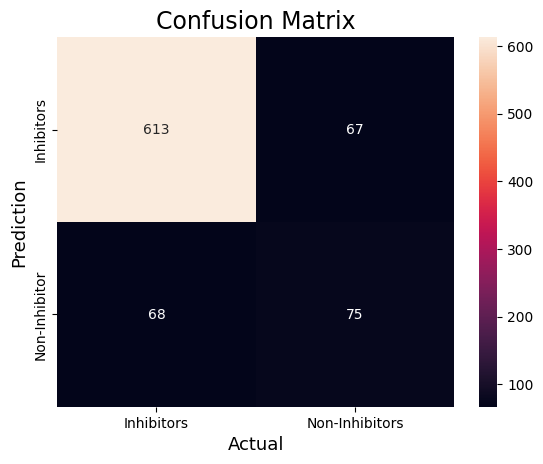

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Inhibitors','Non-Inhibitors'],
            yticklabels=['Inhibitors','Non-Inhibitor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Support Vector Model

# **PROCESSING VALIDATING DATA**

## Acquriring validating data

In [ ]:
#the path contains the link where the data to be processed is located
path3 = "/content/gdrive/My Drive/Colab Notebooks/FinalYearProject/VP16_bioactivity_preprocessed.csv"

valdata = pd.read_csv(path3)
colname = ["canonical_smiles", "bioactivity_class"]
valdata = valdata[colname]
valdata


,canonical_smiles,bioactivity_class
0,O=c1ccc2c(ccc3ncccc32)o1,inactive
1,CC(=O)NC(c1cc(Cl)c2cccnc2c1O)C(C)C,intermediate
2,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,inactive
3,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,inactive
4,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,inactive
...,...,...
930,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,inactive
931,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,inactive
932,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,inactive
933,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,inactive


In [ ]:
valdata.describe()

,canonical_smiles,bioactivity_class
count,935,935
unique,929,3
top,O=C(OC(c1ccccc1)c1nccc2ccccc12)c1ccccc1,inactive
freq,2,717


In [ ]:
valdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   canonical_smiles   935 non-null    object
 1   bioactivity_class  935 non-null    object
dtypes: object(2)
memory usage: 14.7+ KB


In [ ]:
valdata.drop_duplicates(inplace = True, ignore_index = True)
valdata

,canonical_smiles,bioactivity_class
0,O=c1ccc2c(ccc3ncccc32)o1,inactive
1,CC(=O)NC(c1cc(Cl)c2cccnc2c1O)C(C)C,intermediate
2,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,inactive
3,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,inactive
4,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,inactive
...,...,...
930,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,inactive
931,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,inactive
932,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,inactive
933,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,inactive


In [ ]:
#Removing all the intermediate
#valdata[valdata.bioactivity_class == "intermediate"]
valdata.drop(valdata[valdata.bioactivity_class == "intermediate"].index, axis = 0, inplace = True)
valdata

,canonical_smiles,bioactivity_class
0,O=c1ccc2c(ccc3ncccc32)o1,inactive
2,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,inactive
3,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,inactive
4,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,inactive
5,COc1ccc2nc(O)c(CN(CCN3CCCC3)C(=O)Nc3ccccc3Cl)c...,inactive
...,...,...
930,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,inactive
931,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,inactive
932,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,inactive
933,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,inactive


In [ ]:
valdata.reset_index(inplace = True, drop = False)
valdata.drop(["index"], axis = 1, inplace = True)

## Encoding validation data

In [ ]:
#Encoding the activity data into 1s and 0s using LabelBinarizer from sklearn.preprocessing module
from sklearn.preprocessing import LabelBinarizer

lb_val = LabelBinarizer()
valdata["encoded"] = lb_val.fit_transform(valdata["bioactivity_class"])
valdata

swap_dict = {0: "Inactive", 1: "Active"}
valdata["encoded"]= valdata["encoded"].replace(swap_dict)
#encoded[encoded == 0] = "Inactive"
#encoded[encoded == 1] = "Active"

# Transform back to binary
valdata["encoded"] = lb.fit_transform(valdata["encoded"])
valdata

,canonical_smiles,bioactivity_class,encoded
0,O=c1ccc2c(ccc3ncccc32)o1,inactive,0
1,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,inactive,0
2,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,inactive,0
3,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,inactive,0
4,COc1ccc2nc(O)c(CN(CCN3CCCC3)C(=O)Nc3ccccc3Cl)c...,inactive,0
...,...,...,...
726,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,inactive,0
727,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,inactive,0
728,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,inactive,0
729,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,inactive,0


In [ ]:
cols = ["canonical_smiles", "encoded"]
valdata = valdata[cols]
valdata

,canonical_smiles,encoded
0,O=c1ccc2c(ccc3ncccc32)o1,0
1,COc1ccc(Nc2ncnc3ccc(Br)cc23)c(OC)c1,0
2,Cc1cc(/C=C2\Cc3ccccc3C2=O)c(C)n1-c1ccccc1,0
3,Cc1nc2c(-c3ccc(F)cc3)cnn2c(N)c1-c1ccccc1,0
4,COc1ccc2nc(O)c(CN(CCN3CCCC3)C(=O)Nc3ccccc3Cl)c...,0
...,...,...
726,COc1ccc(N2CCN(c3[nH]cnc4c5ccccc5nc3-4)CC2)cc1,0
727,CCc1ccc(CN(C)C(=O)c2cc(COc3cccc4cnccc34)on2)cc1,0
728,CC(C)(C)c1ccc(-c2nnc3sc(-c4ccccn4)nn23)cc1,0
729,c1ccc(C(Cc2nc(-c3ccncc3)no2)c2ccccc2)cc1,0


## Computing Molecular descriptors

In [ ]:
# !pip install rdkit
# !pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached rdkit-2022.9.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.4 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.8 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=687822fdc0fdd70576dd88b0f9a59c1a612b501fa5634af5bc9571677c0cc566
  Stored in directory: /root/.cache/pip/wheels/05/95/d1/9e913738f0e8362b3676917b953a60afd76d2b0b99ff8a71ec
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
# # calculate multiple molecule
# from rdkit import Chem
# from mordred import Calculator, descriptors

# # create descriptor calculator with all descriptors
# calc = Calculator(descriptors, ignore_3D=True)

# len(calc.descriptors)



# valsmiles_list = valdata['canonical_smiles'].to_list()
# mols = [Chem.MolFromSmiles(smi) for smi in valsmiles_list]

# # as pandas
# val_desc = calc.pandas(mols)
# val_desc


100%|██████████| 731/731 [04:12<00:00,  2.89it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.008885,9.506844,0,0,20.184699,2.447092,4.894183,20.184699,1.345647,3.672689,...,9.792277,47.729475,197.047678,8.956713,334,24,82.0,98.0,3.805556,3.250000
1,16.958632,13.563127,0,0,28.942317,2.418738,4.837477,28.942317,1.31556,4.021061,...,10.009603,56.160358,359.026939,9.972971,1057,35,114.0,134.0,6.777778,5.000000
2,19.136972,15.634076,0,0,31.672448,2.487651,4.788067,31.672448,1.319685,4.134711,...,10.186973,75.237519,313.146664,7.282481,1348,39,132.0,160.0,7.0,5.194444
3,19.136972,15.131287,0,0,31.610264,2.525126,4.9766,31.610264,1.317094,4.133221,...,10.255024,73.059872,318.128075,8.157130,1311,41,132.0,160.0,7.0,5.194444
4,24.915146,19.481666,0,1,41.800545,2.420972,4.841477,41.800545,1.306267,4.391966,...,10.283669,80.940601,454.177168,7.697918,3039,48,166.0,193.0,9.611111,7.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,21.677670,15.368412,0,0,37.138212,2.519523,4.92279,37.138212,1.375489,4.259045,...,10.350830,76.969103,359.174610,7.482804,1977,46,150.0,182.0,6.25,5.916667
727,23.391543,17.372108,0,0,39.754798,2.38767,4.761009,39.754798,1.32516,4.331119,...,10.214532,79.099382,401.173942,7.569320,2944,45,156.0,182.0,8.5,6.694444
728,19.345269,15.070372,0,0,31.108624,2.503107,4.861143,31.108624,1.296193,4.13785,...,10.207104,75.028768,335.120467,8.173670,1414,37,134.0,160.0,7.090278,5.027778
729,19.677670,15.401762,0,0,34.197322,2.393566,4.743168,34.197322,1.367893,4.158431,...,9.981235,73.098841,327.137162,7.788980,1549,35,130.0,151.0,5.416667,5.583333


In [ ]:
# # convert dataframe to csv
# val_desc.to_csv("val_desc.csv", index = False)

# # download csv file to local machine
# from google.colab import files
# files.download('val_desc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Preparing final Validation data

In [ ]:
path_val = "/content/gdrive/My Drive/Colab Notebooks/FinalYearProject/val_desc.csv"

X_val1 = pd.read_csv(path_val)
X_val1

<ipython-input-159-75902980c51a>:3: DtypeWarning: Columns (142,151,169,178,187,196,205,214,223,232,349,358,367,385,394,403,412,421,430,439,448,456,464,472,488,496,504,512,520,528,536,544,552,560,568,584,592,600,608,616,624,632,640,833,841,1366) have mixed types. Specify dtype option on import or set low_memory=False.
  X_val1 = pd.read_csv(path_val)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.008885,9.506844,0,0,20.18469913136549,2.447091645761096,4.894183291522189,20.18469913136549,1.3456466087576995,3.672688622347193,...,9.792277,47.729475,197.047678,8.956713,334,24,82.0,98.0,3.805555555555556,3.250000
1,16.958632,13.563127,0,0,28.94231650048852,2.4187383487985494,4.837476697597099,28.94231650048852,1.3155598409312963,4.021061399957617,...,10.009603,56.160358,359.026939,9.972971,1057,35,114.0,134.0,6.777777777777777,5.000000
2,19.136972,15.634076,0,0,31.672448000161648,2.4876510290978313,4.788066707039498,31.672448000161644,1.3196853333400684,4.134711470606273,...,10.186973,75.237519,313.146664,7.282481,1348,39,132.0,160.0,7.0,5.194444
3,19.136972,15.131287,0,0,31.610263780616307,2.525125807280525,4.976599773755189,31.610263780616307,1.317094324192346,4.133220864299109,...,10.255024,73.059872,318.128075,8.157130,1311,41,132.0,160.0,7.0,5.194444
4,24.915146,19.481666,0,1,41.80054469842458,2.4209717419754364,4.841477144505737,41.80054469842458,1.3062670218257681,4.391966335673945,...,10.283669,80.940601,454.177168,7.697918,3039,48,166.0,193.0,9.61111111111111,7.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,21.677670,15.368412,0,0,37.13821176319902,2.5195230311369694,4.922790010341589,37.13821176319902,1.3754893245629265,4.259044834373182,...,10.350830,76.969103,359.174610,7.482804,1977,46,150.0,182.0,6.25,5.916667
727,23.391543,17.372108,0,0,39.75479795569383,2.3876696126204857,4.761009353563616,39.75479795569383,1.325159931856461,4.3311191954895785,...,10.214532,79.099382,401.173942,7.569320,2944,45,156.0,182.0,8.5,6.694444
728,19.345269,15.070372,0,0,31.10862369117012,2.5031069877083403,4.861142787056886,31.10862369117012,1.296192653798755,4.137850387984663,...,10.207104,75.028768,335.120467,8.173670,1414,37,134.0,160.0,7.090277777777779,5.027778
729,19.677670,15.401762,0,0,34.19732194058993,2.393565825239764,4.743167510100344,34.19732194058993,1.3678928776235972,4.158431444047762,...,9.981235,73.098841,327.137162,7.788980,1549,35,130.0,151.0,5.416666666666667,5.583333


In [ ]:
y_val = valdata['encoded']
y_val

0      0
1      0
2      0
3      0
4      0
      ..
726    0
727    0
728    0
729    0
730    0
Name: encoded, Length: 731, dtype: int64

In [ ]:
X_val = pd.DataFrame(my_pipeline.transform(X_val1), columns = mi_cols)
X_val

,SlogP_VSA1,TopoPSA(NO),SMR_VSA3,EState_VSA8,PEOE_VSA8,Xc-5d,SMR_VSA6,SlogP_VSA3,PEOE_VSA11,EState_VSA1,...,MATS1d,ZMIC3,MATS2v,AATSC6c,RPCG,StsC,AATSC3i,NsBr,SsssssAs,AATS3m
0,-0.570316,-0.887785,-0.595194,-0.782139,-0.064486,-0.824197,-1.146207,-1.298470,-0.819277,-0.600196,...,-0.672391,-1.556423,-1.579941,-1.547216,5.171300,-0.158713,0.827183,-0.189207,0.0,0.487835
1,0.698975,-0.493290,0.090760,0.415726,-0.579364,-0.763462,0.173703,-1.298470,-0.819277,-0.600196,...,1.080398,0.071063,1.680244,-2.026559,-1.060298,-0.158713,-0.990394,4.676954,0.0,1.955085
2,-1.349428,-1.519816,-0.652570,0.939749,0.775279,-0.068356,-1.146207,-0.590370,0.095968,-0.600196,...,1.217449,-0.919110,0.173667,0.181705,0.823063,-0.158713,0.896647,-0.189207,0.0,-0.479336
3,-0.555348,-0.495087,0.728008,-0.776901,-0.926829,-0.246199,-0.758831,-1.298470,0.074434,-0.600196,...,0.997719,-0.920240,-0.125713,-0.494385,-0.674013,-0.158713,0.448790,-0.189207,0.0,0.333440
4,0.042946,0.155515,0.753572,-0.315578,0.008182,-0.287974,1.462052,-0.576702,-0.819277,-0.600196,...,-0.129629,-0.481149,0.084208,0.232425,-0.233758,-0.158713,-0.095080,-0.189207,0.0,-0.508024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.663821,-0.463036,0.776713,0.724075,0.965001,-0.399054,1.764933,-1.298470,-0.819277,-0.600196,...,0.962013,-0.314235,0.431990,-0.125206,-1.403847,-0.158713,1.449933,-0.189207,0.0,-0.389872
727,-0.693399,-0.128150,0.788910,0.323590,1.368505,-0.437737,-0.670055,0.860017,0.993438,-0.600196,...,0.480568,-0.826117,0.416904,0.881025,-0.109006,-0.158713,-0.329482,-0.189207,0.0,-0.385655
728,-1.349428,-0.502276,2.131489,1.973046,-0.880963,0.304766,-1.146207,-0.701295,0.894978,-0.600196,...,0.600754,0.040258,1.148456,0.061770,1.074795,-0.158713,-1.226610,-0.189207,0.0,0.311319
729,-1.349428,-0.626885,0.800480,1.897187,0.461244,-0.763462,-1.146207,-0.590370,-0.819277,-0.600196,...,-0.569291,0.288691,-1.933783,-0.004180,0.586894,-0.158713,0.042731,-0.189207,0.0,-0.755172


## making predictions

In [ ]:
# Make predictions on the validation set
yval_pred = rfc.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, yval_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8303693570451436


# Similarity Mapping